Ref: 1605.05450, see eq. 5

In [6]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [7]:
lep_data_ll = np.load('../../processed_ntuples/vanilla/LL/source/lep_source_data_ll.npy')
lep_dic_ll = {'lepPt1': lep_data_ll.T[0,0], 'lepPt2': lep_data_ll.T[0,1], 'lepEta1': lep_data_ll.T[1,0], 'lepEta2': lep_data_ll.T[1,1], 'lepPhi1': lep_data_ll.T[2,0], 'lepPhi2': lep_data_ll.T[2,1]}
df_ll = pd.DataFrame(lep_dic_ll)
l_ll = df_ll.to_numpy()
lep_ids_data_ll = np.load('../../processed_ntuples/vanilla/LL/scalednorm/lep_ids_data_ll.npy')
lep_ids_dict_ll = {'pdgIdl1': lep_ids_data_ll.T[0,0], 'pdgIdl2': lep_ids_data_ll.T[0,1]}
df_ids_ll = pd.DataFrame(lep_ids_dict_ll)
ids_ll = df_ids_ll.to_numpy()
leps_ll = np.concatenate([ids_ll, l_ll], axis=1)

lep_data_tl = np.load('../../processed_ntuples/vanilla/TL/source/lep_source_data_tl.npy')
lep_dic_tl = {'lepPt1': lep_data_tl.T[0,0], 'lepPt2': lep_data_tl.T[0,1], 'lepEta1': lep_data_tl.T[1,0], 'lepEta2': lep_data_tl.T[1,1], 'lepPhi1': lep_data_tl.T[2,0], 'lepPhi2': lep_data_tl.T[2,1]}
df_tl = pd.DataFrame(lep_dic_tl)
l_tl = df_tl.to_numpy()
lep_ids_data_tl = np.load('../../processed_ntuples/vanilla/TL/scalednorm/lep_ids_data_tl.npy')
lep_ids_dict_tl = {'pdgIdl1': lep_ids_data_tl.T[0,0], 'pdgIdl2': lep_ids_data_tl.T[0,1]}
df_ids_tl = pd.DataFrame(lep_ids_dict_tl)
ids_tl = df_ids_tl.to_numpy()
leps_tl = np.concatenate([ids_tl, l_tl], axis=1)

lep_data_tt = np.load('../../processed_ntuples/vanilla/TT/source/lep_source_data_tt.npy')
lep_dic_tt = {'lepPt1': lep_data_tt.T[0,0], 'lepPt2': lep_data_tt.T[0,1], 'lepEta1': lep_data_tt.T[1,0], 'lepEta2': lep_data_tt.T[1,1], 'lepPhi1': lep_data_tt.T[2,0], 'lepPhi2': lep_data_tt.T[2,1]}
df_tt = pd.DataFrame(lep_dic_tt)
l_tt = df_tt.to_numpy()
lep_ids_data_tt = np.load('../../processed_ntuples/vanilla/TT/scalednorm/lep_ids_data_tt.npy')
lep_ids_dict_tt = {'pdgIdl1': lep_ids_data_tt.T[0,0], 'pdgIdl2': lep_ids_data_tt.T[0,1]}
df_ids_tt = pd.DataFrame(lep_ids_dict_tt)
ids_tt = df_ids_tt.to_numpy()
leps_tt = np.concatenate([ids_tt, l_tt], axis=1)

In [9]:
e_mass = 0.000510998950
mu_mass = 0.10565837
w_mass = 80.377

def four_momentum(l_id, pt, eta, phi):
    # only for electrons or muons
    # from pt eta phi m to px py pz E
    px = pt * np.cos(phi)
    py = pt * np.sin(phi)
    pz = pt * np.sinh(eta)
    p = pt * np.cosh(eta)
    en = np.where(np.abs(l_id)==11, np.sqrt(e_mass**2 + p**2), np.sqrt(mu_mass**2 + p**2))
    return np.array([en, px, py, pz]).T

def inv_mass(fourv):
    return np.sqrt(fourv[:,0]**2 - fourv[:,1]**2 - fourv[:,2]**2 - fourv[:,3]**2)

def back_four_momentum(fourp):
    # only for w
    # from px py pz E to pt eta phi m
    en, px, py, pz = fourp[:,0], fourp[:,1], fourp[:,2], fourp[:,3]
    p = np.sqrt(px**2 + py**2 + pz**2)
    theta = np.arccos(pz/p)
    eta = - np.log(np.tan(theta*0.5))
    pt = np.sqrt(px**2 + py**2)
    phi = np.arccos(px/pt) - np.pi*np.heaviside(-py, 0)
    w_mass = 80.377
    en = np.sqrt(w_mass**2 + p**2)
    return np.array([pt, eta, phi]).T

In [10]:
# collinssoper calculation

def cos_theta(leps):

    lep1 = leps[:,::2]
    lep2 = leps[:,1::2]
    l1 = four_momentum(lep1[:,0], lep1[:,1], lep1[:,2], lep1[:,3])
    l2 = four_momentum(lep2[:,0], lep2[:,1], lep2[:,2], lep2[:,3])

    pz_12 = l1[:,3]+l2[:,3]
    first_term = pz_12 / np.abs(pz_12)

    m_12 = np.sqrt((l1[:,0]+l2[:,0])**2 - (l1[:,1]+l2[:,1])**2 - (l1[:,2]+l2[:,2])**2 - (l1[:,3]+l2[:,3])**2)
    pt_12 = np.sqrt((l1[:,1] + l2[:,1])**2 + (l1[:,2] + l2[:,2])**2)
    second_term =  2. / (m_12 * np.sqrt(m_12**2 + pt_12**2))

    pPlus_1 = (l1[:,0] + l1[:,3]) / np.sqrt(2.)
    pMinus_1 = (l1[:,0] - l1[:,3]) / np.sqrt(2.)
    pPlus_2 = (l2[:,0] + l2[:,3]) / np.sqrt(2.)
    pMinus_2 = (l2[:,0] - l2[:,3]) / np.sqrt(2.)
    third_term = pPlus_1*pMinus_2 - pMinus_1*pPlus_2

    res = first_term * second_term * third_term

    return res

In [11]:
# computation
costhetas_ll = cos_theta(leps_ll)
costhetas_tl = cos_theta(leps_tl)
costhetas_tt = cos_theta(leps_tt)

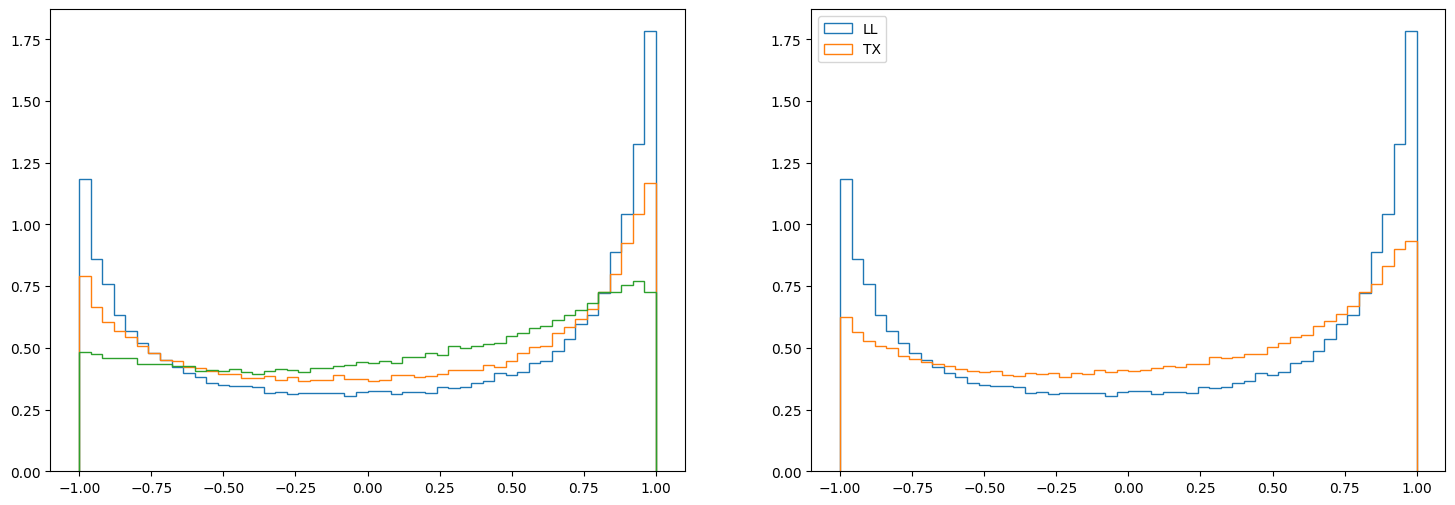

In [12]:
# visual
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
ax[0].hist(costhetas_ll, bins=50, density=True, histtype='step', label='LL')
ax[0].hist(costhetas_tl, bins=50, density=True, histtype='step', label='TL')
ax[0].hist(costhetas_tt, bins=50, density=True, histtype='step', label='TT')
ax[1].hist(costhetas_ll, bins=50, density=True, histtype='step', label='LL')
ax[1].hist(np.concatenate([costhetas_tl, costhetas_tt]), bins=50, density=True, histtype='step', label='TX')
plt.legend()

In [13]:
# saving source data
np.save('costhetas_source_ll.npy', costhetas_ll)
np.save('costhetas_source_tl.npy', costhetas_tl)
np.save('costhetas_source_tt.npy', costhetas_tt)

np.save('collinssoper_source_LL.npy', costhetas_ll)
np.save('collinssoper_source_TX.npy', np.concatenate([costhetas_tl, costhetas_tt]))

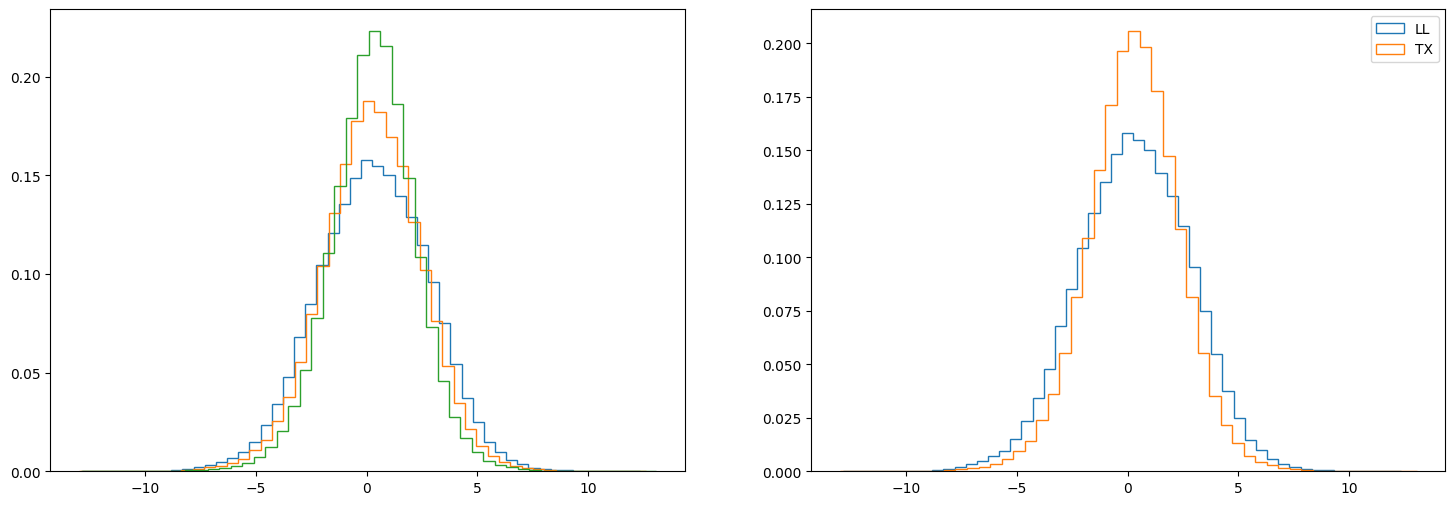

In [14]:
# scaling

def logit(x, clip=1e-6):
    x = np.clip(x, a_min=clip, a_max=1-clip)
    return np.log(x/(1-x))

scaled_costhetas_ll = logit((costhetas_ll + 1.)/(2.), clip=1e-6)
scaled_costhetas_tl = logit((costhetas_tl + 1.)/(2.), clip=1e-6)
scaled_costhetas_tt = logit((costhetas_tt + 1.)/(2.), clip=1e-6)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
ax[0].hist(scaled_costhetas_ll, bins=50, density=True, histtype='step', label='LL')
ax[0].hist(scaled_costhetas_tl, bins=50, density=True, histtype='step', label='TL')
ax[0].hist(scaled_costhetas_tt, bins=50, density=True, histtype='step', label='TT')
ax[1].hist(scaled_costhetas_ll, bins=50, density=True, histtype='step', label='LL')
ax[1].hist(np.concatenate([scaled_costhetas_tl, scaled_costhetas_tt]), bins=50, density=True, histtype='step', label='TX')
plt.legend()

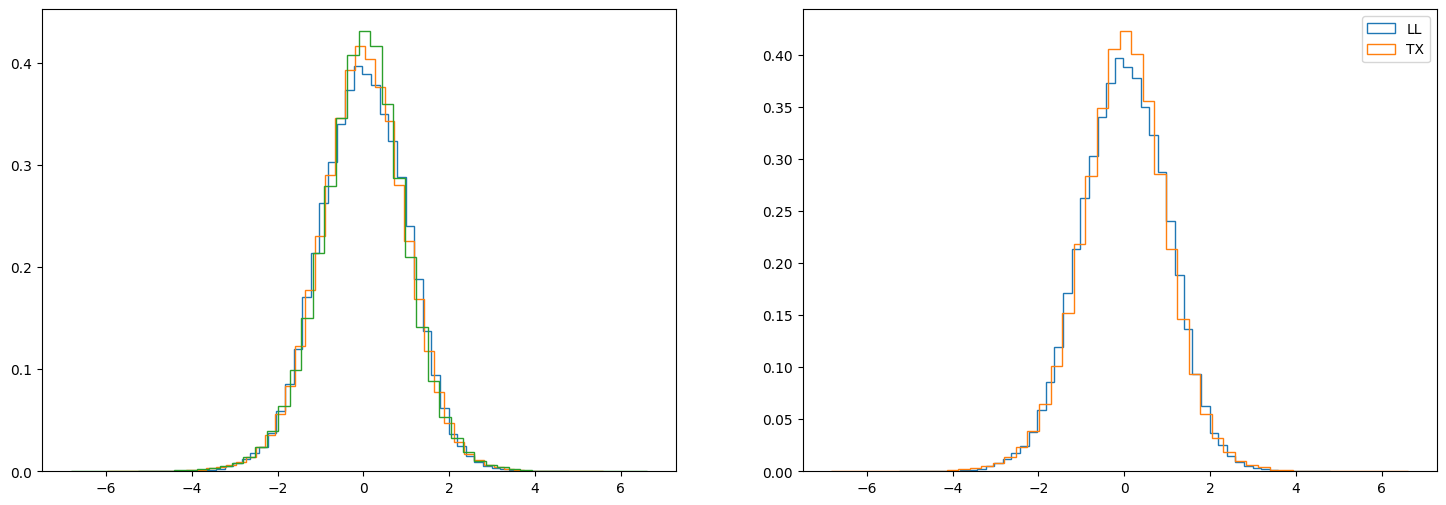

In [15]:
# normalization

costhetas_ll_mean = np.mean(scaled_costhetas_ll)*np.ones(len(scaled_costhetas_ll))
costhetas_ll_std = np.std(scaled_costhetas_ll)*np.ones(len(scaled_costhetas_ll))
scalednorm_costhetas_ll = (scaled_costhetas_ll - costhetas_ll_mean) / costhetas_ll_std

costhetas_tl_mean = np.mean(scaled_costhetas_tl)*np.ones(len(scaled_costhetas_tl))
costhetas_tl_std = np.std(scaled_costhetas_tl)*np.ones(len(scaled_costhetas_tl))
scalednorm_costhetas_tl = (scaled_costhetas_tl - costhetas_tl_mean) / costhetas_tl_std

costhetas_tt_mean = np.mean(scaled_costhetas_tt)*np.ones(len(scaled_costhetas_tt))
costhetas_tt_std = np.std(scaled_costhetas_tt)*np.ones(len(scaled_costhetas_tt))
scalednorm_costhetas_tt = (scaled_costhetas_tt - costhetas_tt_mean) / costhetas_tt_std

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
ax[0].hist(scalednorm_costhetas_ll, bins=50, density=True, histtype='step', label='LL')
ax[0].hist(scalednorm_costhetas_tl, bins=50, density=True, histtype='step', label='TL')
ax[0].hist(scalednorm_costhetas_tt, bins=50, density=True, histtype='step', label='TT')
ax[1].hist(scalednorm_costhetas_ll, bins=50, density=True, histtype='step', label='LL')
ax[1].hist(np.concatenate([scalednorm_costhetas_tl, scalednorm_costhetas_tt]), bins=50, density=True, histtype='step', label='TX')
plt.legend()

In [16]:
# saving scalednorm data

np.save('costhetas_ll.npy', scalednorm_costhetas_ll)
np.save('costhetas_tl.npy', scalednorm_costhetas_tl)
np.save('costhetas_tt.npy', scalednorm_costhetas_tt)

np.save('collinssoper_LL.npy', scalednorm_costhetas_ll)
np.save('collinssoper_TX.npy', np.concatenate([scalednorm_costhetas_tl, scalednorm_costhetas_tt]))

In [ ]:
#